# Laboration 2 - Stokastiska metoder, Monte Carlo

#### Eric Johansson, Can Kupeli, Samuel Greenberg

In [1]:
import math
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from numpy import random


## Uppgift 1

### a)

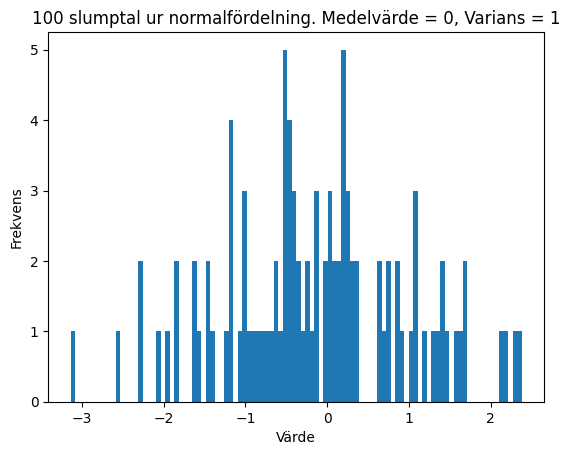

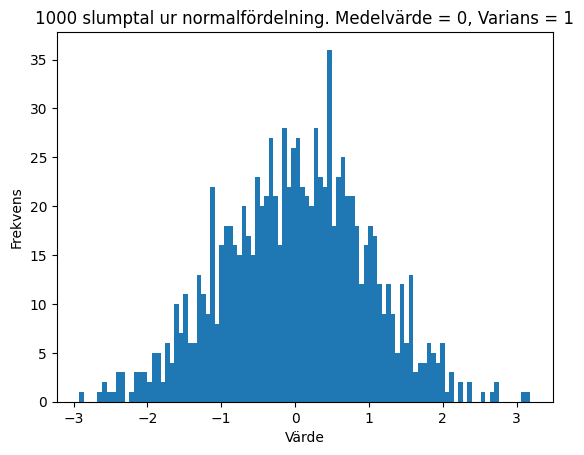

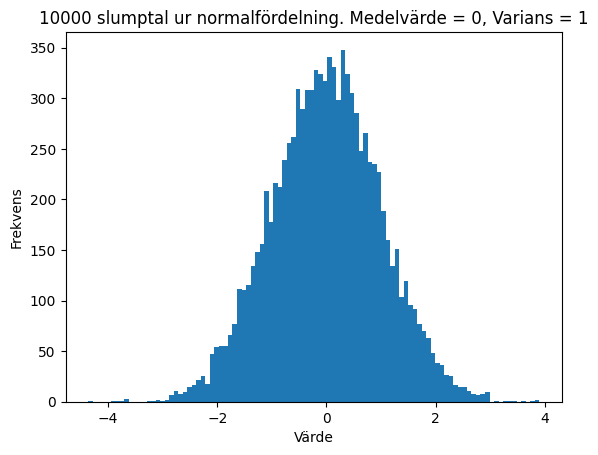

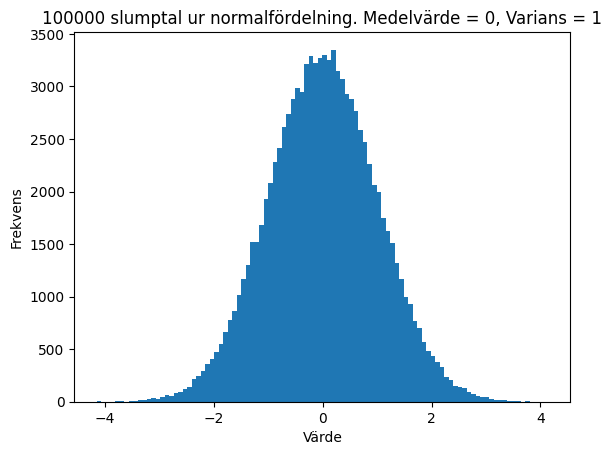

In [2]:
from python_functions import python_normal, python_likform

for N in [1e2, 1e3, 1e4, 1e5]:
    python_normal(int(N))


Vi kan se att allt eftersom $N$ ökar blir distributionen mer lik en normalfördelning.

### b)

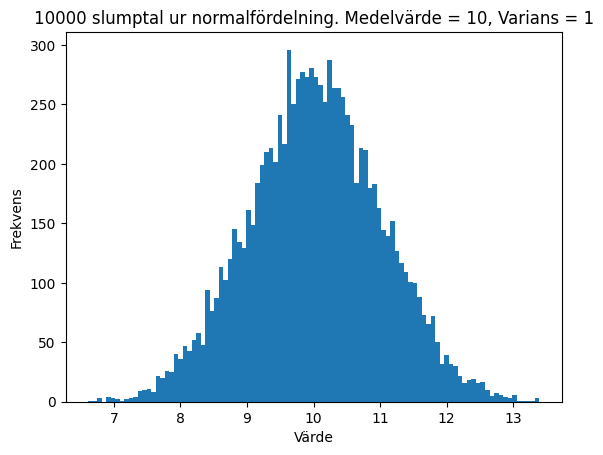

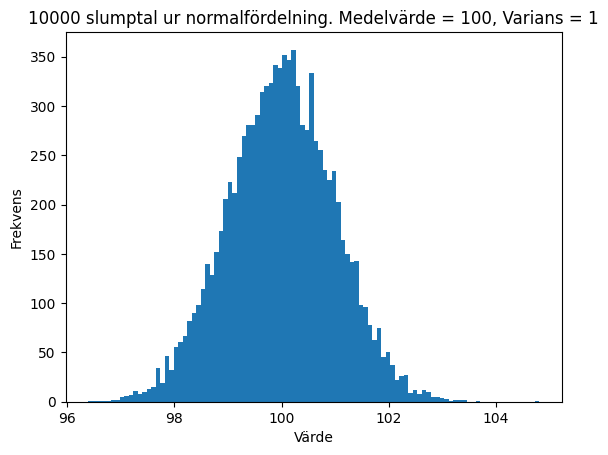

In [3]:
for mu in [10, 100]:
    python_normal(10000, mu)


Vi kan se att fördelsningen är väldigt lik, skillnaden är värdet de centreras kring. Alltså väntevärdet $\mu$.

### c)

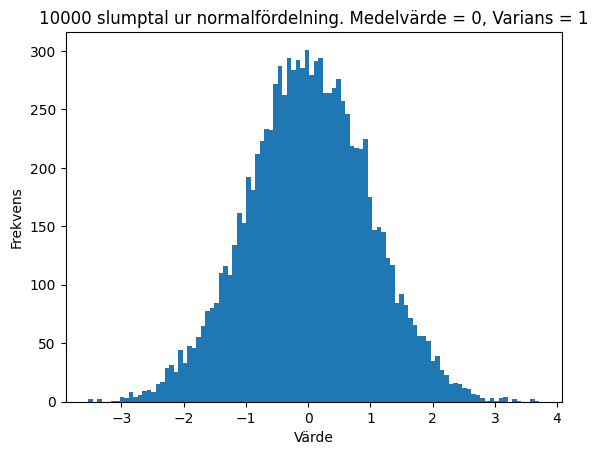

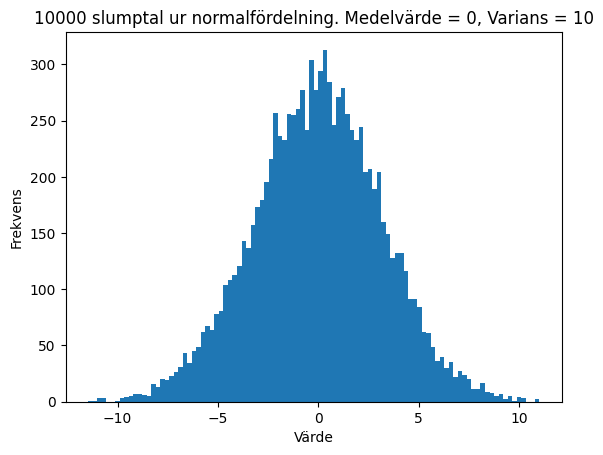

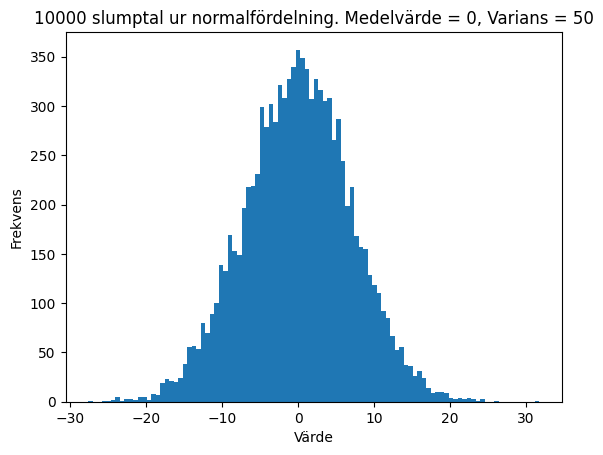

In [4]:
for var in [1, 10, 50]:
    python_normal(10000, 0, var)


Återigen är utseendet på fördelningen väldigt lik i alla 3 figurerna. Det vi kan se är att de sträcker ut sig mer och mer. Däremot så ligger inte extrempunkterna i figur 3 50 gånger längre bort än dem i figur 1 fastän variansen är 50 gånger större. Detta är eftersom standardavvikelsen $\sigma$ är kvadratroten av variansen. Alltså borde figur 3 nå ca $\sqrt{50}\approx7.1$ gånger längre än figur 1 vilket stämmer ganska bra överens med resultatet vi fick.

### d)

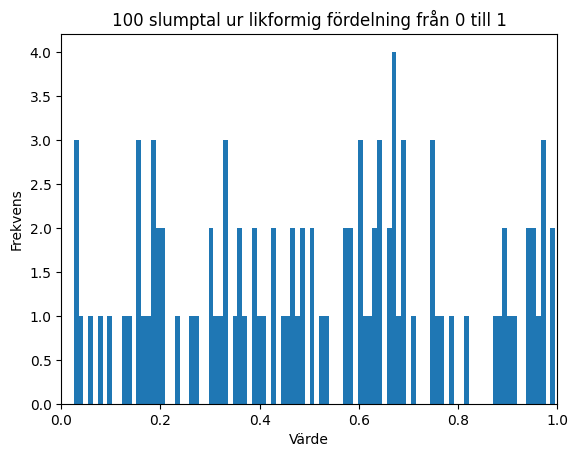

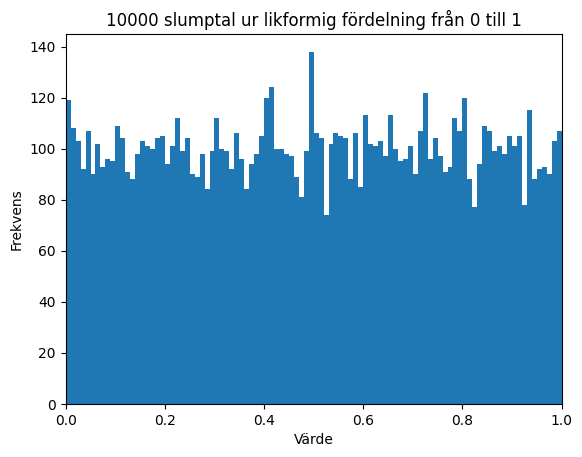

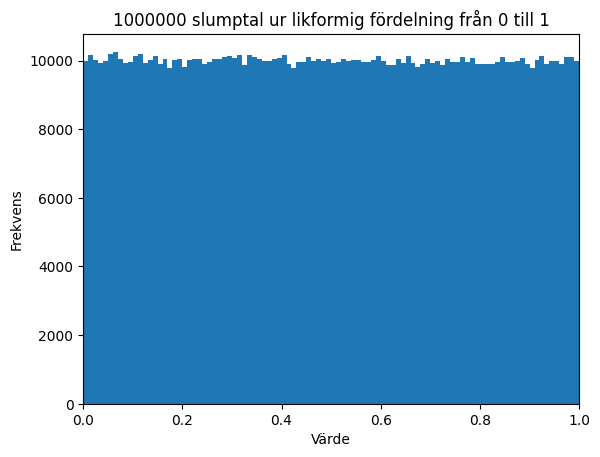

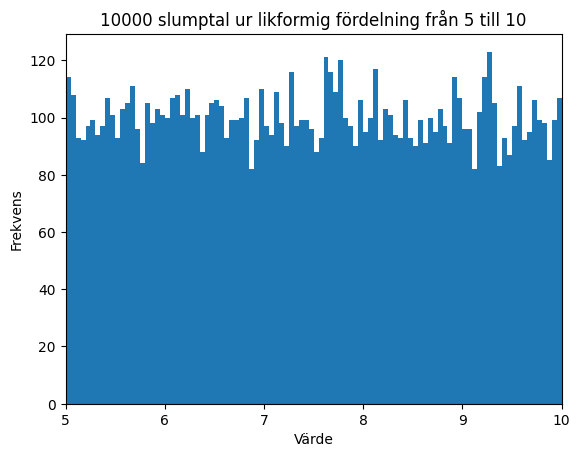

In [5]:
for N in [10**2, 10**4, 10**6]:
    python_likform(N)

# Testa annat intervall
python_likform(10**4, 5, 10)


Allteftersom $\lim_N\rightarrow \infty$ blir distributionen mer lik en likformig fördelning. Justeringen av intervallet ändrade inte utformningen men hade påverkan på funktionens värdemängd.

## Uppgift 2

### a)

In [6]:
for N in [10**3, 10**4, 10**5]:
    print(f"{N} slumptal gav medelvärdet {np.mean(np.floor(1+6*random.rand(N)))}")


1000 slumptal gav medelvärdet 3.439
10000 slumptal gav medelvärdet 3.5199
100000 slumptal gav medelvärdet 3.49993


Ja, när $N$ ökar så konvergerar funktionen till 3.5.

### b)

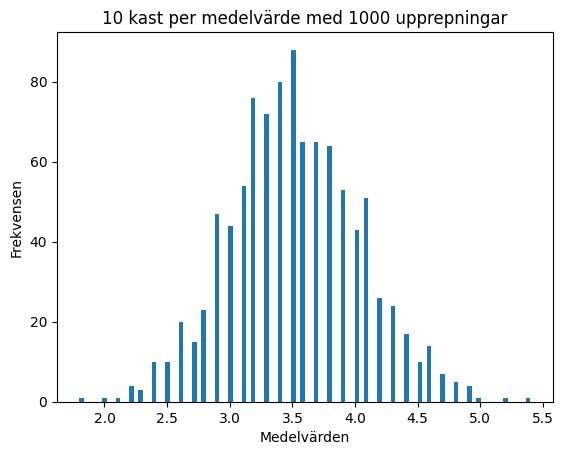

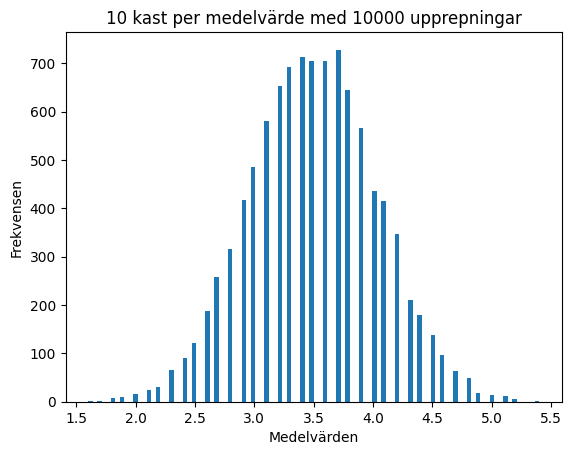

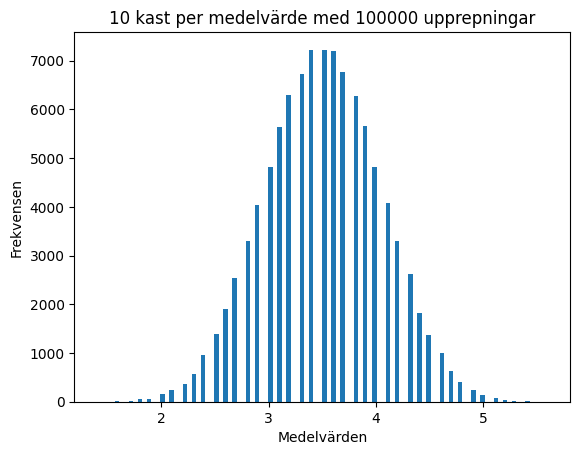

In [7]:
from python_functions import tarning_upprepa

tarning_upprepa()


Det blir mer och mer likt en normalfördelning om vi utför fler upprepningar.

### c)

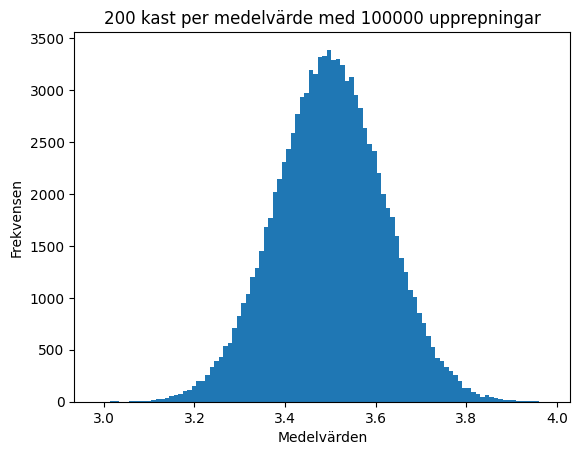

In [8]:
tarning_upprepa(200, [10**5])


Resultatet av att öka antalet kast per medelvärde är att variansen blev lägre. Detta sker eftersom det är lägre sannolikhet att få extremfall som t.ex. att få alla 6or om man kastar 200 gånger jämfört med 10. Därav blir resultaten närmre 3.5 och variansen blir lägre.

### d)

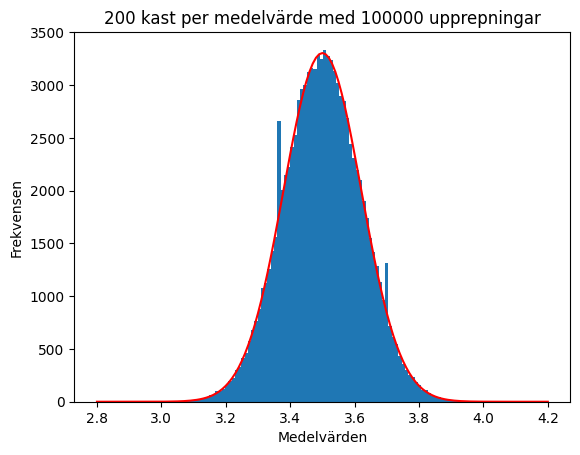

In [9]:
from python_functions import tarning_egen

n = 200
N = 10**5

sigma = np.sqrt(35 / (12 * n))
mu = 3.5
x = np.arange(2.8, 4.2, 0.01)
f = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((x - mu) ** 2) / (2 * sigma**2))

tarning_egen(n, N, f * 1000, x)

$f$ s magnitud är oberoende på antalet upprepningar och därför måste vi multiplicera den med 1000 för att få den att passa in med histogrammet

### e)

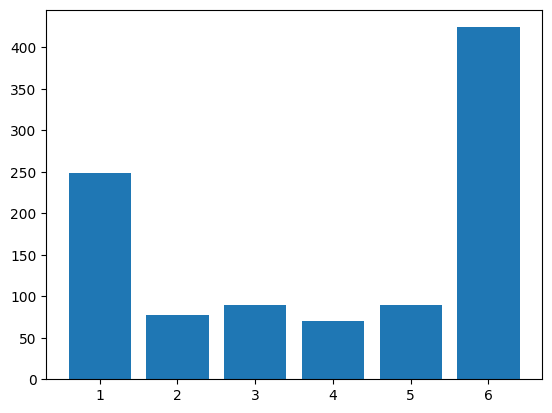

In [34]:
from collections import Counter

loops = 1000
p = np.array([3, 1, 1, 1, 1, 5])

p = p / np.sum(p)
F = np.cumsum(p)

counter = 0
inverse_sampler = np.zeros(loops)
while counter < loops:
    u = random.rand()
    inverse_sampler[counter] = np.sum(u > F) + 1
    counter += 1

counter = Counter(inverse_sampler)
plt.bar(counter.keys(), counter.values())
plt.show()


Om vi jämför värdena i histogrammet mot de i $p$ så stämmer de ganska bra överens. 1 är ungefär 3 gånger så stor som 2,3,4,5 och 6 är lite mindre än dubbla 1.

För att skapa en kontinuelig stokastisk variabel med täthetsfunktion tar du den kummulativa summan av täthetsfunktionen och hittar dess invers. Slutligen beräknar du den som $X=F-1(u)$

Den samplade kumulativa fördelningsfunktionen skapar ett verktyg som simulerar sannolikheterna för varje kast, där
deras sannolikhet motsvarar en procentandel av urvalet. Att skapa ett slumpmässigt tärningskast som följer
korrekt sannolikhet görs genom interpolation, insättning av ett slumpmässigt genererat tal i det kumulativa
distributionen returnerar ett tärningskast. Eftersom rand ger mellan 0 och 1 så adderar vi 1 till alla tal till sum(u > F) då den returnerar mellan 0 och 5

## Uppgift 3

### a)

In [ ]:
from python_functions import mc_conv

arr =  [10**3,10**4,10**5,10**6]

print("1D")
for N in arr:
    n, mu, err = mc_conv(np.array([[-5, 5]]), N)
    print(f"{n} gav medelvärdet {mu} och felet {err}")

print("\n2D")
for N in arr:
    n, mu, err = mc_conv(np.array([[-5, 5], [-5, 5]]), N)
    print(f"{n} gav medelvärdet {mu} och felet {err}")



Ja, i 1D konvergerar $\mu$ till $\sqrt{\pi}$ medan i 2D konvergerar det till $\pi$. Detta är en logisk ökning då $\pi = \sqrt{\pi}^2$ och att 2D har ett kvadratiskt förhållande till 1D, t.ex. längd och area.

### b)

In [ ]:
i = 6
mu = np.zeros(i)
err = np.zeros(i)
N = np.zeros(i)

for j in range(i):
    N[j], mu[j], err[j] = mc_conv(np.array([[-5, 5]]), 10 ** (j + 1))

a = np.polyfit(np.log(N), np.log(err), 1)

print("1D")
print(f"p = {a[0]} och C = {np.exp(a[1])}")


mu = np.zeros(i)
err = np.zeros(i)
N = np.zeros(i)

for j in range(i):
    N[j], mu[j], err[j] = mc_conv(np.array([[-5, 5], [-5, 5]]), 10 ** (j + 1))

a = np.polyfit(np.log(N), np.log(err), 1)
print("\n2D")
print(f"p = {a[0]} och C = {np.exp(a[1])}")


$p$ ändrades inte beroende på dimensionen.

$C$ däremot ökade ganska mycket, med en faktor runt 3-5.

### c)

För trapetsmetoden skulle det behövas $5^d$ beräkningar, där $d$ är dimenstionen. För 2d blir det
25, för 10d blir det 9765625, för 20d blir det 9.53674316e13. Alltså väldigt stor ökning. Däremot ändras inte 
beräkningsintensiteten för Monte Carlo med dimensionen. En god tumregel är att använda sig av Monte Carlo 
över simpons eller trapetsmetoden om man är i över 10 dimensioner